### Tran Quoc Long - 14520490

## Bài tập 2: Handwritten digits - clustering

Thực hiện các phép cluster trên bộ dữ liệu handwritten digits
Nội dung bao gồm trong file:
1. Chạy thử các hàm cluster và các hàm liên quan
    - Kmeans
    - Spectral clustering
    - DBSCAN
    - Agglomerative clustering
    - Cross table
    - Figure to visualize result
    - Show centroid of Kmeans
2. Nội dung thực hành 2

### Chạy thử các hàm cluster và các hàm liên quan

### K-means

In [1]:
#import libs
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import scikit-learn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

In [3]:
digits = load_digits();
print(digits.data.shape);

(1797, 64)


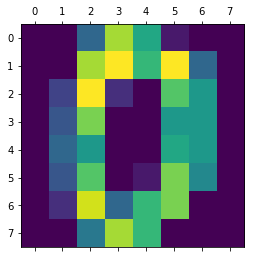

In [4]:
%matplotlib inline
#plt.gray(); 
plt.matshow(digits.images[0]);

In [5]:
nClusters = 10
model1 = KMeans(nClusters)
labels_kmeans = model1.fit_predict(digits.data)

In [6]:
df = pd.DataFrame({'labels':labels_kmeans,'Truth labels':digits.target})
ct = pd.crosstab(df['labels'],df['Truth labels'])
print(ct)

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0   0    3    7    9    0    0  175    5    7
1               0   1    0    2    0  136    0    0    4    6
2             177   0    1    0    0    0    1    0    0    0
3               0   0    2    9    0   42    0    0   48  138
4               0  24  148    1    0    0    0    0    3    0
5               0   2    0    0    0    1  177    0    2    0
6               0   1   13  157    0    1    0    0    4    7
7               1   0    0    0  164    2    0    0    0    0
8               0  99    8    7    3    0    2    2  102    2
9               0  55    2    0    5    0    1    2    6   20


Predict Label: 2
Truth:  0


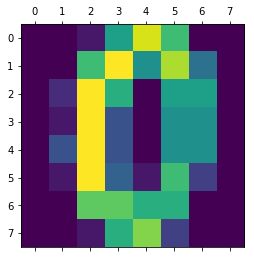

In [7]:
n = 10
%matplotlib inline
plt.matshow(digits.images[n])
print('Predict Label:', labels_kmeans[n])

print('Truth: ', digits.target[n])

### Visualization - Kmeans

In [8]:
#import libs
import numpy as np
from sklearn.decomposition import PCA

##### PCA

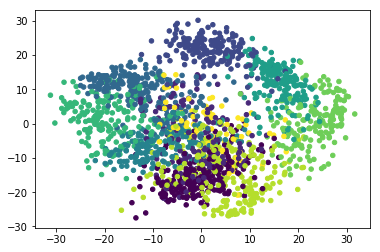

In [9]:
nComponents = 2
vPCA = PCA(nComponents)
digitData_to_2D = vPCA.fit_transform(digits.data)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_kmeans, s=20)
plt.show()

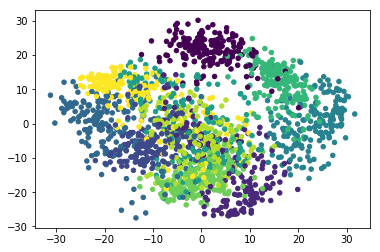

In [10]:
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= digits.target, s=20)
plt.show()

## Speactral clustering

In [11]:
# Spectral_clustering

from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
import numpy as np
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity

# dist = DistanceMetric.get_metric('euclidean')
# graph=dist.pairwise(digits.data) 

graph = cosine_similarity(digits.data)
label_spectral = spectral_clustering(graph, n_clusters=10)

### Cross table biểu thị kết quả và so sánh

In [12]:
df1 = pd.DataFrame({'labels':label_spectral,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               1   0    0    0  163    2    0    0    0    0
1               0   0    1  147    0    0    0    0    6    2
2             177   0    1    0    1    1    0    0    0    3
3               0   0    0    4    0  157    0    0    3    3
4               0  36  115    4    0    0    0    0    1    0
5               0   0    0   16    0   20    2    0    7  133
6               0   0    2    2   11    0    0  154    3    2
7               0   2    0    0    0    2  172    0   13    0
8               0  86   53    5    5    0    7   10  101    1
9               0  58    5    5    1    0    0   15   40   36


lables_predict: 3
 True:  5


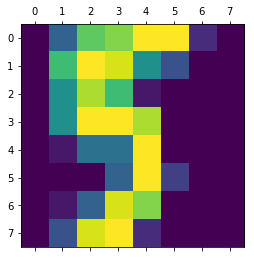

In [13]:
n = 15
plt.matshow(digits.images[n])
print('lables_predict:',label_spectral[n])
print(' True: ', digits.target[n])

#### Visualization - Spectral Clustering


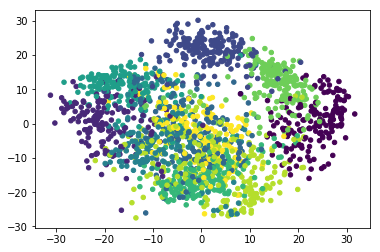

In [14]:
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= label_spectral, s=20)
plt.show()

### Visualize results to compare - Using PCA

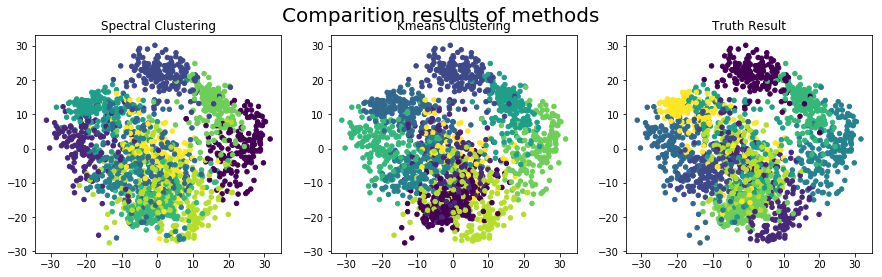

In [15]:
fig = plt.figure(figsize=(15,4))
fig.suptitle('Comparition results of methods', fontsize=20)

ax = fig.add_subplot(1,3,1)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= label_spectral, s=20)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(1,3,2)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_kmeans, s=20)
ax.set_title('Kmeans Clustering')

ax = fig.add_subplot(1,3,3)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= digits.target, s=20)
ax.set_title('Truth Result')

### DBSCAN

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

#import scikit-learn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


In [17]:
digits = load_digits()
data = digits.data
data = StandardScaler().fit_transform(data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [18]:
print(data)

[[ 0.         -0.33501649 -0.04308102 ..., -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  1.56568555  1.6951369
  -0.19600752]
 ..., 
 [ 0.         -0.33501649 -0.88456568 ..., -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...,  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...,  0.8876023  -0.26113572
  -0.19600752]]


In [19]:
db = DBSCAN(eps=1, min_samples=1,algorithm='kd_tree').fit(data)

* với min_samples = 1 => số cluster ra quá lớn = số input ban đầu

In [20]:
print(db)

DBSCAN(algorithm='kd_tree', eps=1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1, n_jobs=1, p=None)


In [22]:
import pandas as pd
df1 = pd.DataFrame({'labels':db.labels_,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Truth labels  0  1  2  3  4  5  6  7  8  9
labels                                    
0             1  0  0  0  0  0  0  0  0  0
1             0  1  0  0  0  0  0  0  0  0
2             0  0  1  0  0  0  0  0  0  0
3             0  0  0  1  0  0  0  0  0  0
4             0  0  0  0  1  0  0  0  0  0
5             0  0  0  0  0  1  0  0  0  0
6             0  0  0  0  0  0  1  0  0  0
7             0  0  0  0  0  0  0  1  0  0
8             0  0  0  0  0  0  0  0  1  0
9             0  0  0  0  0  0  0  0  0  1
10            1  0  0  0  0  0  0  0  0  0
11            0  1  0  0  0  0  0  0  0  0
12            0  0  1  0  0  0  0  0  0  0
13            0  0  0  1  0  0  0  0  0  0
14            0  0  0  0  1  0  0  0  0  0
15            0  0  0  0  0  1  0  0  0  0
16            0  0  0  0  0  0  1  0  0  0
17            0  0  0  0  0  0  0  1  0  0
18            0  0  0  0  0  0  0  0  1  0
19            0  0  0  0  0  0  0  0  0  1
20            1  0  0  0  0  0  0  0  0  0
21         

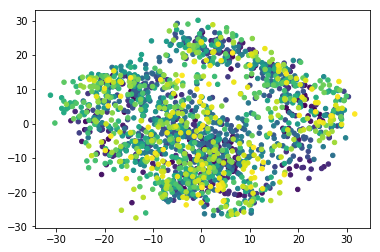

In [23]:
nComponents = 2
vPCA = PCA(nComponents)
digitData_to_2D = vPCA.fit_transform(digits.data)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= db.labels_, s=20)
plt.show()

## Agglomerative Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
Agglomerative_model = AgglomerativeClustering(n_clusters = 10)

In [26]:
db = Agglomerative_model.fit(data)

In [27]:
print(db.labels_)

[5 1 1 ..., 1 1 1]


In [28]:
import pandas as pd
df1 = pd.DataFrame({'labels':db.labels_,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Truth labels    0    1    2    3    4    5    6    7    8    9
labels                                                        
0               0    1    0    0    1  168    0    1    1    3
1               0  150   15   11    4    0    1    1  168   38
2               0    0    1    0    1    0    0    0    0    0
3               0   27  160    4    0    1    0    0    3    0
4               0    0    1  168    0   12    0    1    2  135
5             178    0    0    0    0    0    0    0    0    0
6               0    0    0    0    0    1  180    0    0    1
7               0    0    0    0   12    0    0   25    0    3
8               0    4    0    0  163    0    0    0    0    0
9               0    0    0    0    0    0    0  151    0    0


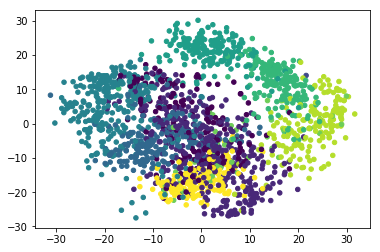

In [29]:
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= db.labels_, s=20)
plt.show()

## Bài thực hành 2

## Comparison of cluster methods

In [1]:
#import libs
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import scikit-learn
from sklearn import metrics
from sklearn.cluster import KMeans, spectral_clustering, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [3]:
digits = load_digits();
print(digits.data.shape);

(1797, 64)


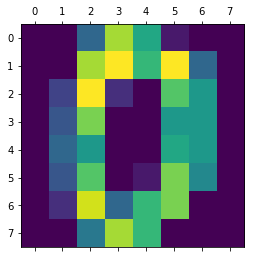

In [4]:
%matplotlib inline
#plt.gray(); 
plt.matshow(digits.images[0]);

### Clustering

In [5]:
#Kmeans
nClusters = 10
t0 = time()
kmeans_model = KMeans(nClusters)
labels_kmeans = kmeans_model.fit_predict(digits.data)
t_kmeans = time()- t0
#Cross table
print('Kmeans:\n')
df1 = pd.DataFrame({'labels':labels_kmeans,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Kmeans:

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0             177   0    1    0    0    0    1    0    0    0
1               0  24  148    1    0    0    0    0    3    0
2               0  55    2    0    7    0    1    2    6   20
3               0   0    3    7    7    0    0  175    4    7
4               0   1    0    2    0  136    0    0    4    6
5               0   0    2    9    0   42    0    0   49  139
6               0   1   13  157    0    1    0    0    3    6
7               1   0    0    0  163    2    0    0    0    0
8               0   2    0    0    0    1  177    0    2    0
9               0  99    8    7    4    0    2    2  103    2


In [6]:
#Spectral_clustering
t0 = time()
graph = cosine_similarity(digits.data)
labels_spectral = spectral_clustering(graph, n_clusters=10)
t_spectral = time()- t0
#Cross table
print('Spectral clustering:\n')
df1 = pd.DataFrame({'labels':labels_spectral,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)


Spectral clustering:

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0  58    5    5    1    0    0   15   40   36
1               0   0    0   16    0   20    2    0    7  133
2               0   2    0    1    0    2  172    0   13    0
3             177   0    1    0    1    1    0    0    0    3
4               0  36  115    4    0    0    0    0    1    0
5               0   0    2    2   11    0    0  154    3    2
6               1   0    0    0  163    2    0    0    0    0
7               0  86   53    5    5    0    7   10  101    1
8               0   0    0    4    0  157    0    0    3    3
9               0   0    1  146    0    0    0    0    6    2


In [7]:
#DBSCAN
data = digits.data
t0 = time()
# data = StandardScaler().fit_transform(data)
labels_dbscan = DBSCAN(eps=0.06, min_samples=10,metric = 'cosine').fit_predict(data)
t_dbscan = time()- t0
#DBSCAN coss table
print('DBSCAN:\n')
df1 = pd.DataFrame({'labels':labels_dbscan,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

DBSCAN:

Truth labels    0    1    2    3    4    5    6    7   8    9
labels                                                       
-1              7   13   41   48   34   65    5   48  77   77
 0            171    0    0    0    0    0    0    0   0    0
 1              0  143    0    0    0    0    1    0  97    1
 2              0    0    0    0    0    0  175    0   0    0
 3              0    0    0  135    0    1    0    0   0  102
 4              0    0    0    0  147    0    0    0   0    0
 5              0    0  136    0    0    0    0    0   0    0
 6              0    0    0    0    0  116    0    0   0    0
 7              0    0    0    0    0    0    0  131   0    0
 8              0   26    0    0    0    0    0    0   0    0


In [8]:
#Agglomerative Clustering
t0 = time()
Agglomerative_model = AgglomerativeClustering(n_clusters = nClusters)
labels_AgglomerativeClustering = Agglomerative_model.fit_predict(data)
t_agg = time() - t0
#Agglomerative Clustering - Crosstable
print('Agglomerative Clustering:\n')
df1 = pd.DataFrame({'labels':labels_AgglomerativeClustering,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Agglomerative Clustering:

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0   0    0    0    0  179    0    0    0    2
1               0   0    0  169    0    2    0    0    1  145
2               0  27  166    0    0    0    0    0    4    0
3               0   0    1    1    3    0    0  179    1   11
4               0   0   10   13    0    0    1    0  165    2
5               0   0    0    0  178    0    0    0    0    0
6               0   0    0    0    0    1  180    0    0    0
7             178   0    0    0    0    0    0    0    0    0
8               0  59    0    0    0    0    0    0    1   20
9               0  96    0    0    0    0    0    0    2    0


### Comparison

In [9]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
sample_size = 300
#print frame
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

print(82 * '_')
print('init\t\ttime\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


data = digits.data
#define a function to measure and print out
def bench_clustering(method_name, time_, labels):
    print('%-9s\t%.2fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (method_name, time_,
             metrics.homogeneity_score(digits.target, labels),
             metrics.completeness_score(digits.target, labels),
             metrics.v_measure_score(digits.target, labels),
             metrics.adjusted_rand_score(digits.target, labels),
             metrics.adjusted_mutual_info_score(digits.target,  labels),
             metrics.silhouette_score(data, labels,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    

#Kmeans
bench_clustering('K-means', t_kmeans, labels_kmeans)
#Spectral_clustering
bench_clustering('spectral', t_spectral, labels_spectral)

#Agglomerative clustering
bench_clustering('Agg.', t_agg, labels_AgglomerativeClustering)
#DBSCAN 
bench_clustering('DBSCAN', t_dbscan, labels_dbscan)

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	homo	compl	v-meas	ARI	AMI	silhouette
K-means  	0.17s	0.741	0.749	0.745	0.672	0.738	0.165
spectral 	0.45s	0.711	0.716	0.713	0.624	0.708	0.170
Agg.     	0.13s	0.858	0.879	0.868	0.794	0.856	0.195
DBSCAN   	0.04s	0.709	0.757	0.732	0.520	0.706	0.130


### Nhận xét
* Dựa trên bảng so sánh trên, thông qua các độ đo, ta có thể thấy phương pháp Agglomerative clustering cho kết quả có độ chính xác cao nhất, với tốc độ nhanh nhất trong các phương pháp đã sử dụng

### Visualization

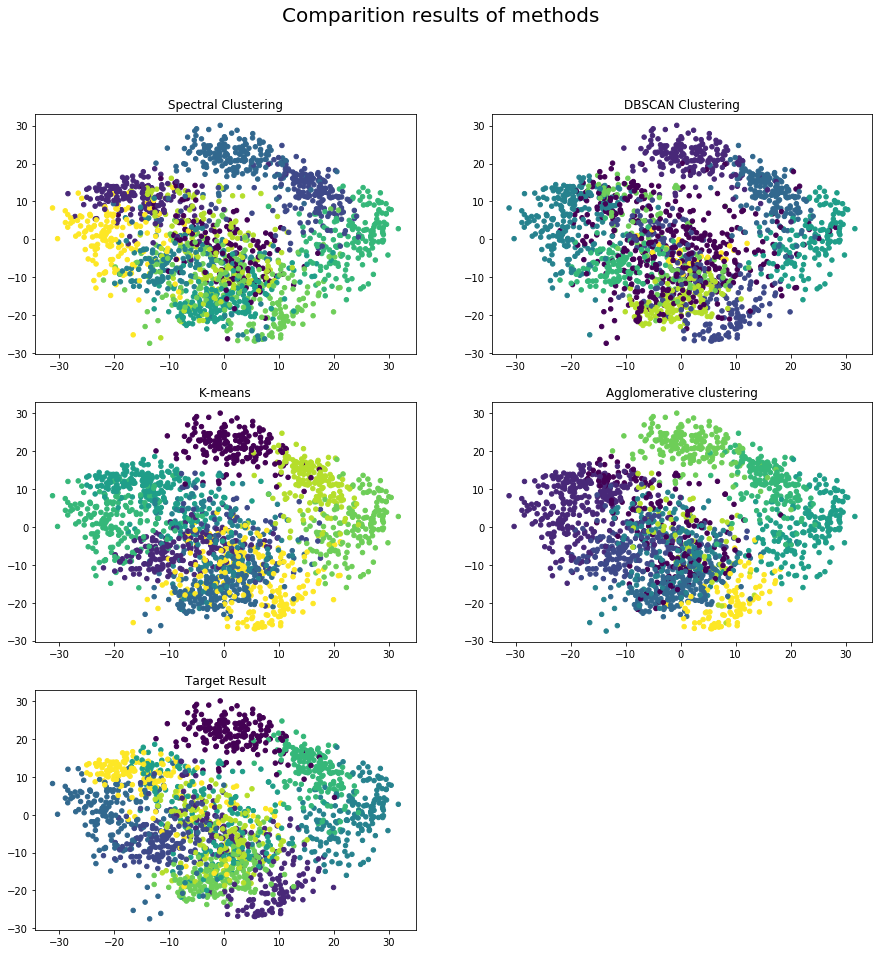

In [10]:
from sklearn.decomposition import PCA

nComponents = 2
vPCA = PCA(nComponents)
digitData_to_2D = vPCA.fit_transform(digits.data)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Comparition results of methods', fontsize=20)

ax = fig.add_subplot(3,2,1)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_spectral, s=20)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(3,2,2)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_dbscan, s=20)
ax.set_title('DBSCAN Clustering')

ax = fig.add_subplot(3,2,3)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_kmeans, s=20)
ax.set_title('K-means')

ax = fig.add_subplot(3,2,4)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_AgglomerativeClustering, s=20)
ax.set_title('Agglomerative clustering')

ax = fig.add_subplot(3,2,5)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= digits.target, s=20)
ax.set_title('Target Result')


### Show centroids

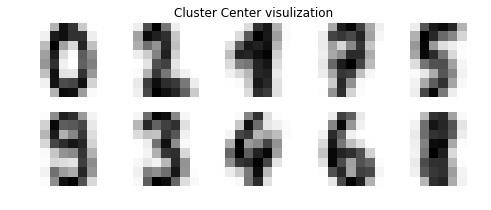

In [12]:
# create a fig to show image
fig = plt.figure(figsize=(8,3))
plt.title('Cluster Center visulization')
plt.axis('off')
# for all 0-9 labels
for i in range(10):
    # initialize subplots in a grid 2x5 at i+1th position
    ax = fig.add_subplot(2, 5, 1+i)
    
    # display image
    ax.imshow(kmeans_model.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary)
    #don't show the axes
    plt.axis('off')

plt.show()

* ( Các centroid có biểu thị hình ảnh là các chữ số )